0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
3
3
3
4
1
1
1
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
3
3
3
4
1
1
1
1
1


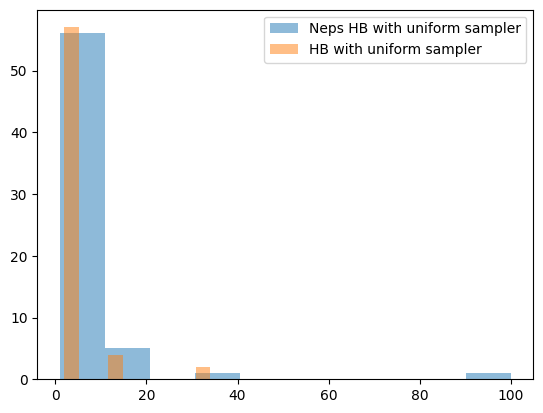

In [ ]:
import neps
from neps import algorithms
from functools import partial
import matplotlib.pyplot as plt
global_values = []
eta=3
for algo in [partial(algorithms.neps_hyperband, eta=eta), 
             partial(algorithms.hyperband, eta=eta),]:
            #  partial(algorithms.neps_hyperband, sampler="prior", eta=eta)]: 
            #  partial(algorithms.hyperband, sampler="prior", eta=eta)]:
    neps.run(
        evaluate_pipeline,
        SimpleSpace(),
        root_directory="neps_test_runs/algo_tests3",
        overwrite_root_directory=True,
        optimizer=algo,
        fidelities_to_spend=473
    )


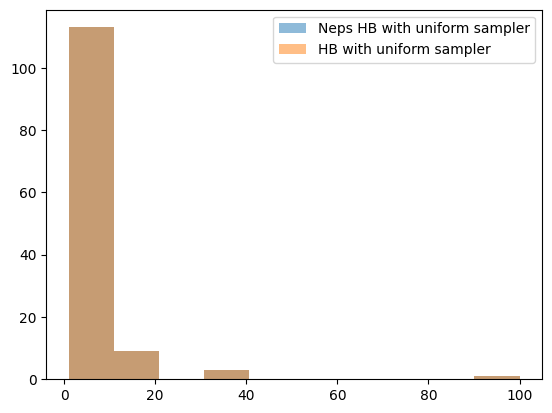

In [25]:

plt.hist(global_values[:len(global_values)//2], alpha=0.5, label='Neps HB with uniform sampler',bins=10)
plt.hist(global_values[len(global_values)//2:], alpha=0.5, label='HB with uniform sampler',bins=10)
# plt.hist([v+2 for n,v in enumerate(global_values) if n % 4 == 2], alpha=0.5, label='Neps HB with prior sampler',bins=10)
# plt.hist([v+3 for n,v in enumerate(global_values) if n % 4 == 3], alpha=0.5, label='HB with prior sampler',bins=10)
plt.legend()
plt.show()


In [27]:
n_algos = 2
for i in range(n_algos):
    for j in [v for v in range(1000) if v in global_values]:
        le = len(global_values)//2
        print(f"Count of {j:<3} in algo {i}: ", global_values[le*i:le*(i+1)].count(j))


Count of 1   in algo 0:  81
Count of 3   in algo 0:  32
Count of 11  in algo 0:  9
Count of 33  in algo 0:  3
Count of 100 in algo 0:  1
Count of 1   in algo 1:  81
Count of 3   in algo 1:  32
Count of 11  in algo 1:  9
Count of 33  in algo 1:  3
Count of 100 in algo 1:  1


In [12]:
from neps.space.neps_spaces.parameters import PipelineSpace, Operation, Categorical, Resampled, Integer, Fidelity
import neps

# Define the NEPS space for the neural network architecture
class SimpleSpace(PipelineSpace):
    i1 = Fidelity(Integer(1,100))
    i2 = Integer(0,50)
    i3 = Categorical(['a','b','c'])
global_values = []
def evaluate_pipeline(i1, i2, i3, *args, **kwargs):
    # Dummy evaluation function
    global_values.append(i1)
    return {"objective_to_minimize": -i2/50 + i1,
            "cost": i1}

In [13]:
import neps
from neps import algorithms
from functools import partial
import matplotlib.pyplot as plt

global_values = []
eta=3

neps.run(
    evaluate_pipeline,
    SimpleSpace(),
    root_directory="neps_test_runs/algo_tests4",
    overwrite_root_directory=True,
    optimizer=partial(algorithms.neps_hyperband, eta=eta),
    fidelities_to_spend=1
)

neps.run(
    evaluate_pipeline,
    SimpleSpace(),
    root_directory="neps_test_runs/algo_tests5",
    overwrite_root_directory=True,
    optimizer=partial(algorithms.hyperband, eta=eta),
    fidelities_to_spend=1
)


for f in range(1,600):
    print(f"Fidelities to spend: {f}")
            #  partial(algorithms.neps_hyperband, sampler="prior", eta=eta)]: 
            #  partial(algorithms.hyperband, sampler="prior", eta=eta)]:
    neps.run(
        evaluate_pipeline,
        SimpleSpace(),
        root_directory="neps_test_runs/algo_tests4",
        overwrite_root_directory=False,
        optimizer=partial(algorithms.neps_hyperband, eta=eta),
        fidelities_to_spend=f
    )

    neps.run(
        evaluate_pipeline,
        SimpleSpace(),
        root_directory="neps_test_runs/algo_tests5",
        overwrite_root_directory=False,
        optimizer=partial(algorithms.hyperband, eta=eta),
        fidelities_to_spend=f
    )


0
0
Fidelities to spend: 1
Fidelities to spend: 2
0
0
Fidelities to spend: 3
0
0
Fidelities to spend: 4
0
0
Fidelities to spend: 5
0
0
Fidelities to spend: 6
0
0
Fidelities to spend: 7
0
0
Fidelities to spend: 8
0
0
Fidelities to spend: 9
0
0
Fidelities to spend: 10
0
0
Fidelities to spend: 11
0
0
Fidelities to spend: 12
0
0
Fidelities to spend: 13
0
0
Fidelities to spend: 14
0
0
Fidelities to spend: 15
0
0
Fidelities to spend: 16
0
0
Fidelities to spend: 17
0
0
Fidelities to spend: 18
0
0
Fidelities to spend: 19
0
0
Fidelities to spend: 20
0
0
Fidelities to spend: 21
0
0
Fidelities to spend: 22
0
0
Fidelities to spend: 23
0
0
Fidelities to spend: 24
0
0
Fidelities to spend: 25
0
0
Fidelities to spend: 26
0
0
Fidelities to spend: 27
0
0
Fidelities to spend: 28
0
0
Fidelities to spend: 29
0
0
Fidelities to spend: 30
0
0
Fidelities to spend: 31
0
0
Fidelities to spend: 32
0
0
Fidelities to spend: 33
0
0
Fidelities to spend: 34
0
0
Fidelities to spend: 35
0
0
Fidelities to spend: 36
0
0
F

In [15]:
n_algos = 2
for i in range(n_algos):
    for j in [v for v in range(1000) if v in global_values]:
        print(f"Count of {j:<3} in algo {i}: ", [v for n,v in enumerate(global_values) if n % n_algos == i].count(j))


Count of 1   in algo 0:  81
Count of 3   in algo 0:  54
Count of 11  in algo 0:  15
Count of 33  in algo 0:  3
Count of 100 in algo 0:  1
Count of 1   in algo 1:  81
Count of 3   in algo 1:  54
Count of 11  in algo 1:  15
Count of 33  in algo 1:  3
Count of 100 in algo 1:  1
